* **Nama:** Eva Meivina Dwiana
* **Email:** evameivina@gmail.com
* **ID Dicoding:** evameivina - MC009D5X0328

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
bank_transactions_data_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/analisisbank/refs/heads/main/submission/bank_transactions_data.csv") # Changed pd.read to pd.read_csv
bank_transactions_data_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### **Memahami Struktur Data**

In [3]:
print(bank_transactions_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
print("\nJumlah Baris dan Kolom:", bank_transactions_data_df.shape)
print("\nTipe Data per Kolom:")
print(bank_transactions_data_df.dtypes)


Jumlah Baris dan Kolom: (2512, 16)

Tipe Data per Kolom:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [5]:
print("\nStatistik Deskriptif:")
print(bank_transactions_data_df.describe())


Statistik Deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


In [6]:
print("\nJumlah Nilai Unik per Kolom:")
print(bank_transactions_data_df.nunique())


Jumlah Nilai Unik per Kolom:
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


#### **Menangani Data yang Hilang**

In [7]:
print("\nJumlah Data Hilang per Kolom:")
print(bank_transactions_data_df.isnull().sum())


Jumlah Data Hilang per Kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


#### **Analisis Distribusi dan Korelasi**

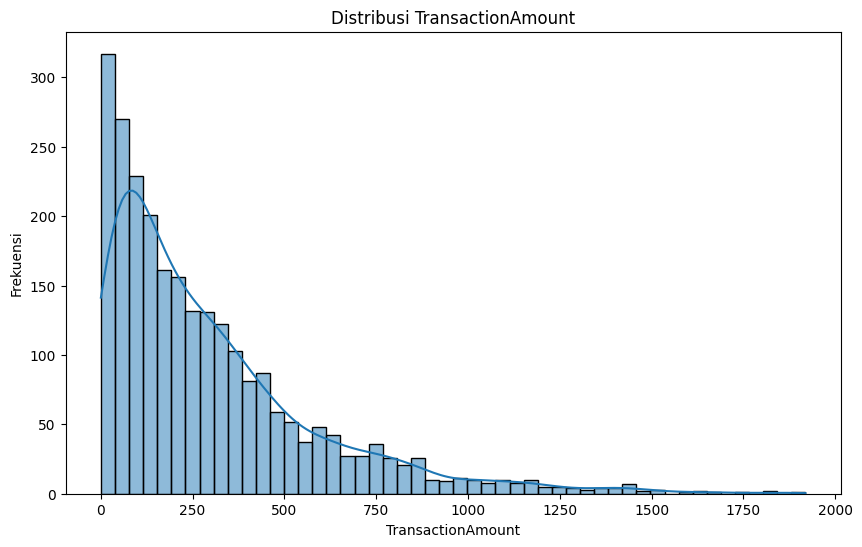

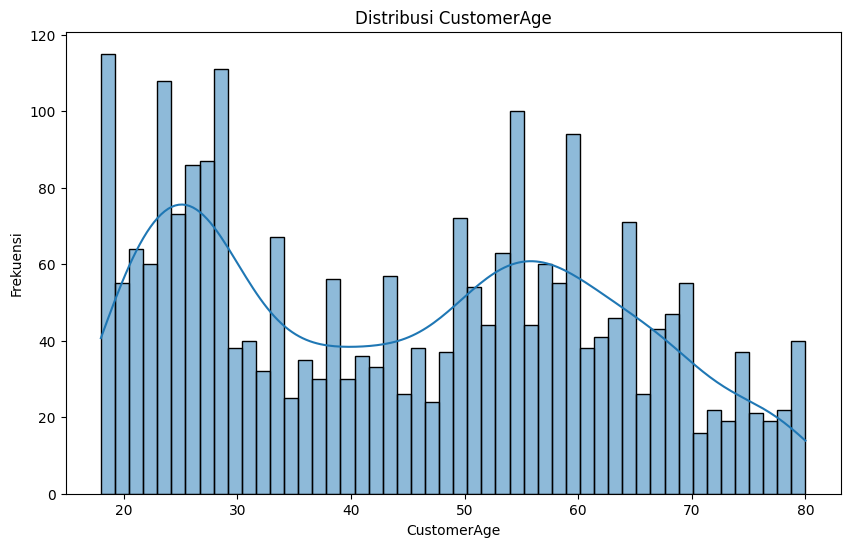

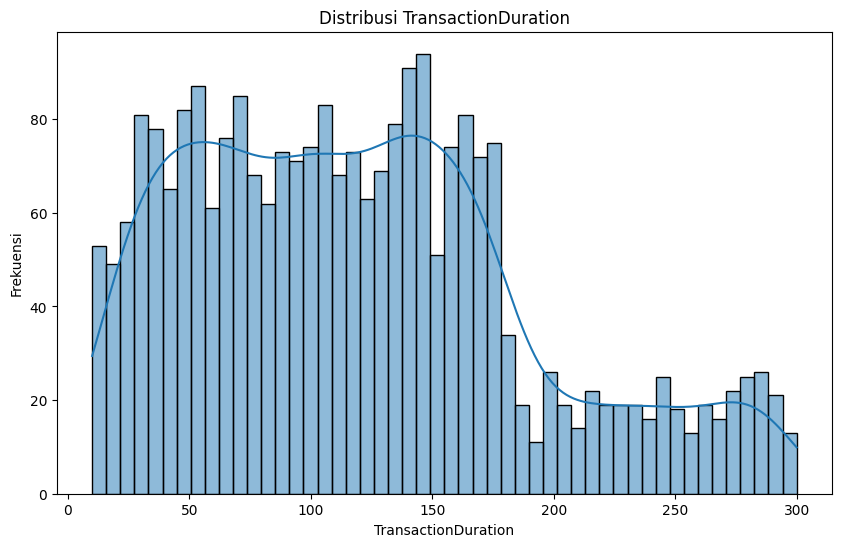

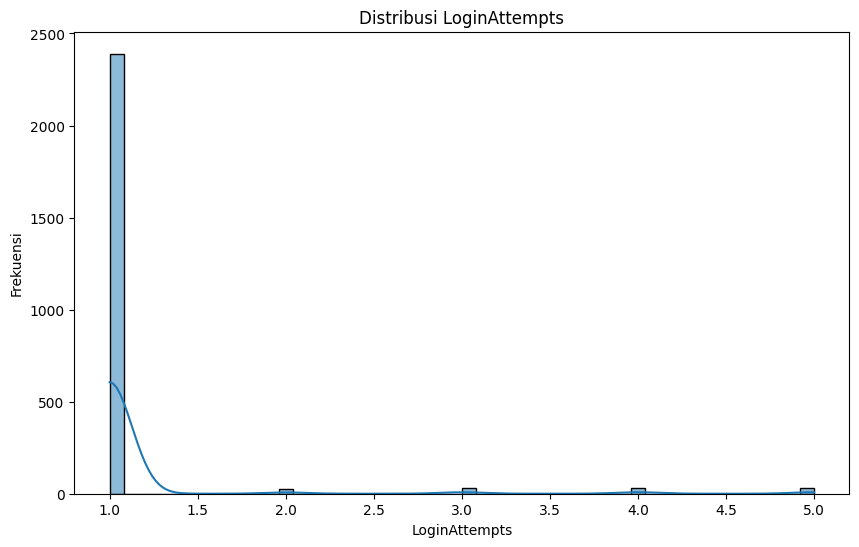

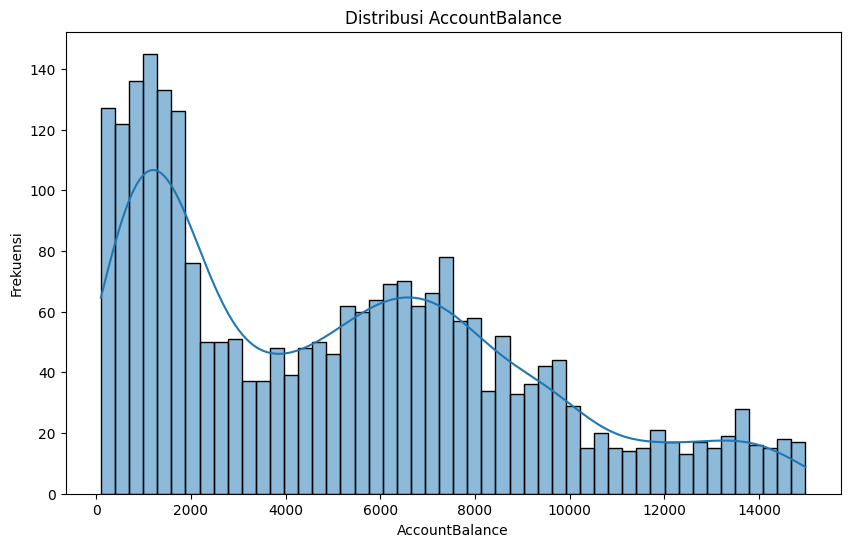

In [8]:
# Analisis distribusi variabel numerik
numerical_columns = bank_transactions_data_df.select_dtypes(include=np.number).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(bank_transactions_data_df[col], bins=50, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

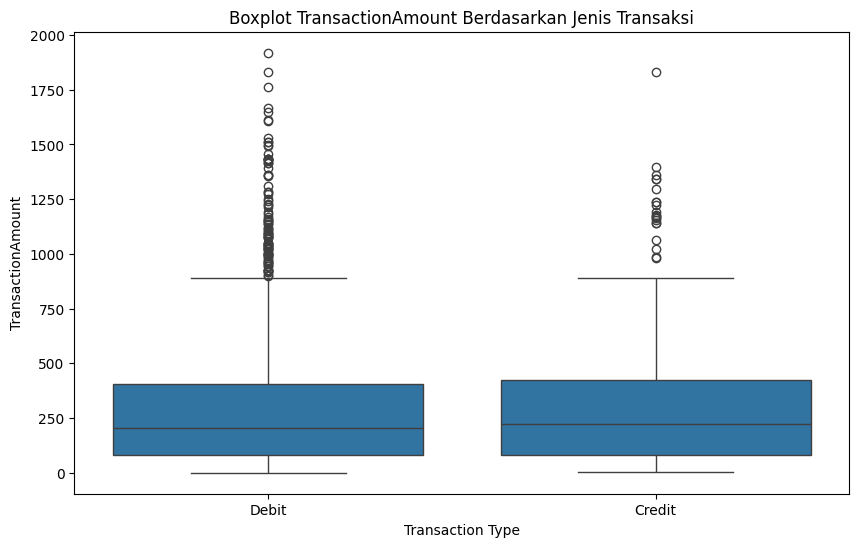

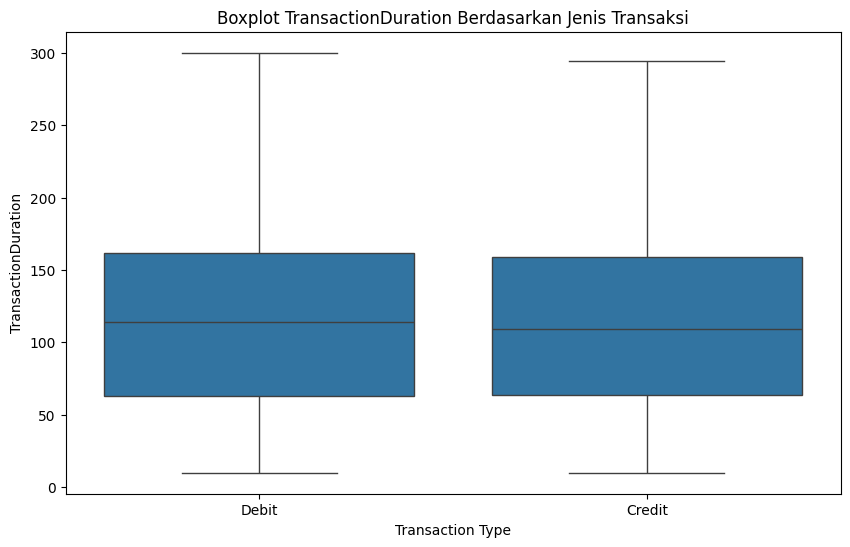

In [9]:
# Boxplot untuk melihat distribusi data numerik berdasarkan TransactionType
for col in ['TransactionAmount', 'TransactionDuration']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=bank_transactions_data_df['TransactionType'], y=bank_transactions_data_df[col])
    plt.title(f"Boxplot {col} Berdasarkan Jenis Transaksi")
    plt.xlabel("Transaction Type")
    plt.ylabel(col)
    plt.show()

#### **Visualisasi Data**

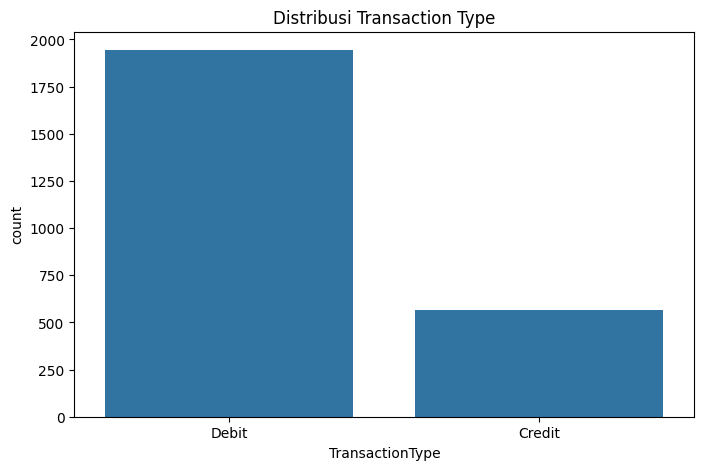

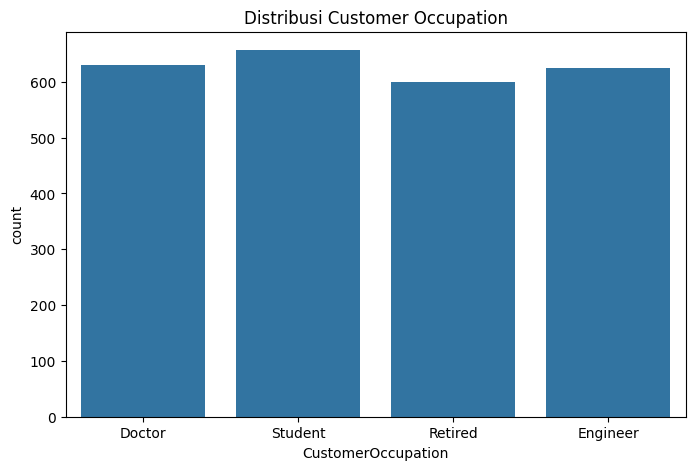

<ipython-input-10-2cdcd4fef0b4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=bank_transactions_data_df, palette='pastel', order=bank_transactions_data_df['Channel'].value_counts().index)


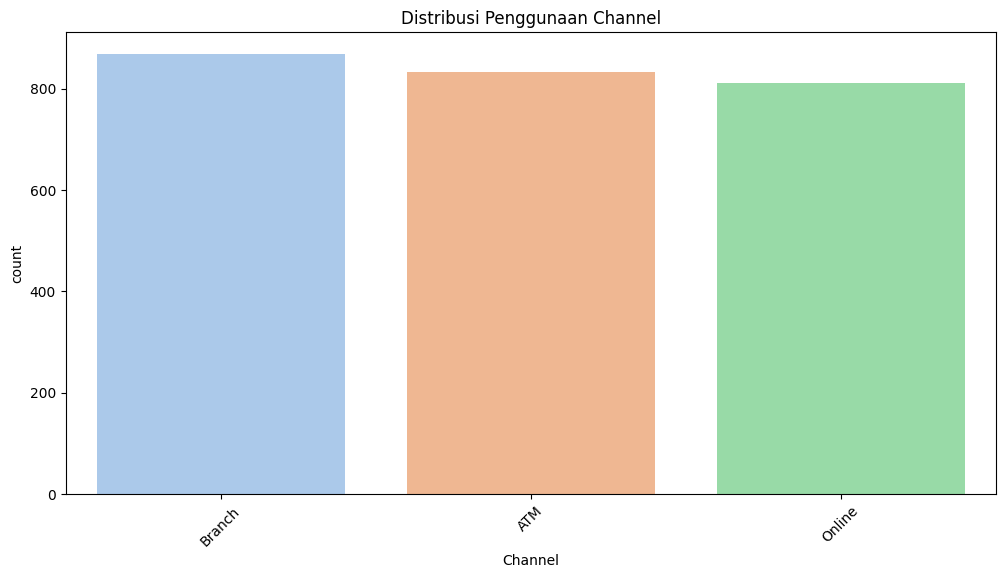

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TransactionType', data=bank_transactions_data_df)
plt.title("Distribusi Transaction Type")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='CustomerOccupation', data=bank_transactions_data_df)
plt.title("Distribusi Customer Occupation")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Channel', data=bank_transactions_data_df, palette='pastel', order=bank_transactions_data_df['Channel'].value_counts().index)
plt.title("Distribusi Penggunaan Channel")
plt.xticks(rotation=45)
plt.show()

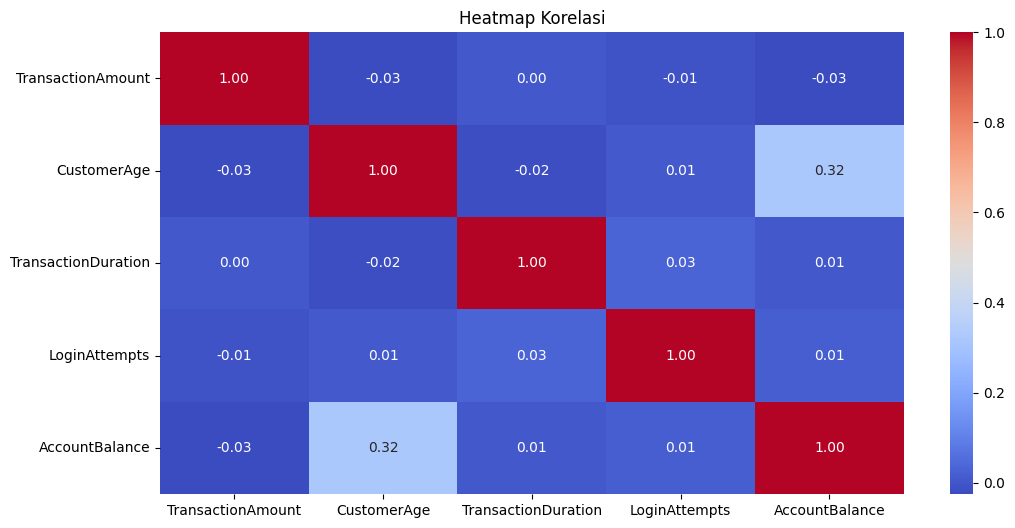

In [11]:
# Analisis korelasi dengan heatmap
plt.figure(figsize=(12, 6))
numerical_df = bank_transactions_data_df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### **Normalisasi**

In [12]:
# Normalisasi Fitur Numerik
scaler = StandardScaler()
bank_transactions_data_df[numerical_columns] = scaler.fit_transform(bank_transactions_data_df[numerical_columns])

print("\nStatistik setelah normalisasi:")
print(bank_transactions_data_df[numerical_columns].describe())


Statistik setelah normalisasi:
       TransactionAmount   CustomerAge  TransactionDuration  LoginAttempts  \
count       2.512000e+03  2.512000e+03         2.512000e+03   2.512000e+03   
mean       -1.414297e-16  9.900078e-18         7.637203e-17   1.527441e-16   
std         1.000199e+00  1.000199e+00         1.000199e+00   1.000199e+00   
min        -1.018657e+00 -1.499493e+00        -1.567456e+00  -2.067936e-01   
25%        -7.390118e-01 -9.935526e-01        -8.097706e-01  -2.067936e-01   
50%        -2.961881e-01  1.832826e-02        -1.021205e-01  -2.067936e-01   
75%         4.006114e-01  8.053467e-01         5.912336e-01  -2.067936e-01   
max         5.555266e+00  1.985874e+00         2.578372e+00   6.431745e+00   

       AccountBalance  
count    2.512000e+03  
mean     4.985396e-17  
std      1.000199e+00  
min     -1.285344e+00  
25%     -9.255845e-01  
50%     -9.712227e-02  
75%      6.575405e-01  
max      2.529043e+00  


#### **Deteksi dan Penanganan Outlier**

In [13]:
# Deteksi dan Penanganan Outlier (Menggunakan IQR)
def remove_outliers(df, column):
    Q1 = bank_transactions_data_df[column].quantile(0.25)
    Q3 = bank_transactions_data_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return bank_transactions_data_df[(bank_transactions_data_df[column] >= lower_bound) & (bank_transactions_data_df[column] <= upper_bound)]

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration']
for col in numerical_columns:
    bank_transactions_data_df = remove_outliers(bank_transactions_data_df, col)

print("\nCek jumlah baris setelah menghapus outlier:", bank_transactions_data_df.shape)


Cek jumlah baris setelah menghapus outlier: (2399, 16)


#### **Encoding Data Kategorikal**

In [14]:
# Encoding Data Kategorikal
label_encoders = {}
categorical_columns = ['TransactionType', 'CustomerOccupation', 'Channel']
for col in categorical_columns:
    le = LabelEncoder()
    bank_transactions_data_df[col] = le.fit_transform(bank_transactions_data_df[col])
    label_encoders[col] = le

print("\nContoh data setelah encoding:")
print(bank_transactions_data_df.head())


Contoh data setelah encoding:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID  Channel  \
0                1  San Diego  D000380  162.198.218.92       M015        0   
1                1    Houston  D000051     13.149.61.4       M052        0   
2                1       Mesa  D000235  215.97.143.157       M009        2   
3                1    Raleigh  D000187  200.13.225.150       M002        2   
4                0    Atlanta  D000308    65.164.3.100       M091        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423

#### **Binning**

In [15]:
# Binning pada CustomerAge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
bank_transactions_data_df['AgeGroup'] = pd.cut(bank_transactions_data_df['CustomerAge'] * scaler.scale_[1] + scaler.mean_[1], bins=bins, labels=labels)

In [16]:
# Binning pada TransactionAmount: Mengelompokkan jumlah transaksi
bins_amount = [-np.inf, 100, 500, 1000, 5000, np.inf]  # Sesuaikan dengan distribusi data
labels_amount = ['<100', '100-500', '500-1000', '1000-5000', '5000+']
bank_transactions_data_df['TransactionCategory'] = pd.cut(
    bank_transactions_data_df['TransactionAmount'] * scaler.scale_[0] + scaler.mean_[0],
    bins=bins_amount,
    labels=labels_amount
)

In [17]:
# Menampilkan hasil setelah binning
print("\nHasil Binning CustomerAge:")
print(bank_transactions_data_df[['CustomerAge', 'AgeGroup']].head())

print("\nHasil Binning TransactionAmount:")
print(bank_transactions_data_df[['TransactionAmount', 'TransactionCategory']].head())


Hasil Binning CustomerAge:
   CustomerAge AgeGroup
0     1.423718      65+
1     1.311287      65+
2    -1.443277    18-25
3    -1.049768    26-35
4    -1.049768    26-35

Hasil Binning TransactionAmount:
   TransactionAmount TransactionCategory
0          -0.971275                <100
1           0.269440             100-500
2          -0.586882             100-500
3          -0.387456             100-500
4          -0.973468                <100


In [18]:
# Cek kembali informasi dataset setelah preprocessing lengkap
print("\nInformasi dataset setelah preprocessing:")
print(bank_transactions_data_df.info())


Informasi dataset setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   TransactionID            2399 non-null   object  
 1   AccountID                2399 non-null   object  
 2   TransactionAmount        2399 non-null   float64 
 3   TransactionDate          2399 non-null   object  
 4   TransactionType          2399 non-null   int64   
 5   Location                 2399 non-null   object  
 6   DeviceID                 2399 non-null   object  
 7   IP Address               2399 non-null   object  
 8   MerchantID               2399 non-null   object  
 9   Channel                  2399 non-null   int64   
 10  CustomerAge              2399 non-null   float64 
 11  CustomerOccupation       2399 non-null   int64   
 12  TransactionDuration      2399 non-null   float64 
 13  LoginAttempts            2

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

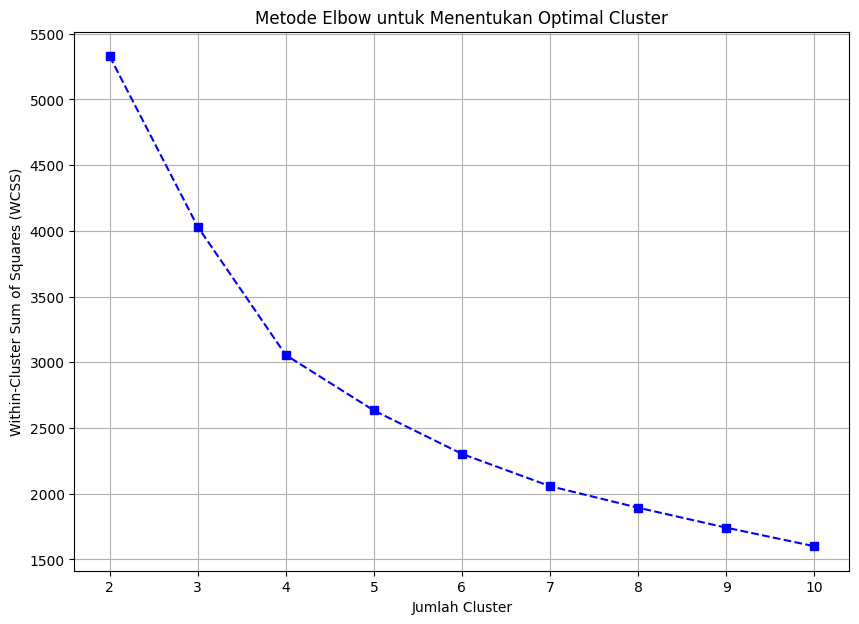

In [19]:
wcss_values = []
cluster_range = range(2, 11)
scaler = StandardScaler()
bank_transactions_data_df_scaled = scaler.fit_transform(bank_transactions_data_df[numerical_columns])

for num_clusters in cluster_range:
    model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    model.fit(bank_transactions_data_df_scaled) # Now bank_transactions_data_df_scaled is defined
    wcss_values.append(model.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, wcss_values, linestyle='--', marker='s', color='b', markersize=6)
plt.title("Metode Elbow untuk Menentukan Optimal Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [20]:
silhouette_vals = {}
cluster_options = range(2, 11)

for clusters in cluster_options:
    model = KMeans(n_clusters=clusters, random_state=42, n_init=10)
    cluster_labels = model.fit_predict(bank_transactions_data_df_scaled)  # Use scaled data for clustering
    sil_score = silhouette_score(bank_transactions_data_df_scaled, cluster_labels)  # Use scaled data for silhouette score
    silhouette_vals[clusters] = sil_score
    print(f"Silhouette Score untuk {clusters} cluster: {sil_score:.4f}")

# Menentukan jumlah cluster optimal
best_cluster_count = max(silhouette_vals, key=silhouette_vals.get)
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {best_cluster_count}")

# Membangun model clustering dengan jumlah cluster optimal
final_model = KMeans(n_clusters=best_cluster_count, random_state=42, n_init=10)

bank_transactions_data_df['Cluster'] = final_model.fit_predict(bank_transactions_data_df_scaled)

Silhouette Score untuk 2 cluster: 0.2683
Silhouette Score untuk 3 cluster: 0.2918
Silhouette Score untuk 4 cluster: 0.3050
Silhouette Score untuk 5 cluster: 0.2857
Silhouette Score untuk 6 cluster: 0.2903
Silhouette Score untuk 7 cluster: 0.2846
Silhouette Score untuk 8 cluster: 0.2809
Silhouette Score untuk 9 cluster: 0.2822
Silhouette Score untuk 10 cluster: 0.2874
Jumlah cluster optimal berdasarkan Silhouette Score: 4


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bank_transactions_data_df[numerical_columns])

In [22]:
selector = VarianceThreshold(threshold=0.01)  # Threshold bisa disesuaikan
df_selected = selector.fit_transform(df_scaled)

print(f"Jumlah fitur sebelum seleksi: {df_scaled.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {df_selected.shape[1]}")

Jumlah fitur sebelum seleksi: 3
Jumlah fitur setelah seleksi: 3


In [23]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [24]:
silhouette_pca = {}
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_pca[k] = score
    print(f"Silhouette Score untuk {k} cluster setelah Feature Selection: {score:.4f}")

optimal_k_pca = max(silhouette_pca, key=silhouette_pca.get)
print(f"Jumlah cluster optimal setelah Feature Selection: {optimal_k_pca}")

df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns, index=bank_transactions_data_df.index)

final_model_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled['Cluster_PCA'] = final_model_pca.fit_predict(df_pca)


Silhouette Score untuk 2 cluster setelah Feature Selection: 0.3197
Silhouette Score untuk 3 cluster setelah Feature Selection: 0.3832
Silhouette Score untuk 4 cluster setelah Feature Selection: 0.3274
Silhouette Score untuk 5 cluster setelah Feature Selection: 0.3320
Silhouette Score untuk 6 cluster setelah Feature Selection: 0.3458
Silhouette Score untuk 7 cluster setelah Feature Selection: 0.3367
Silhouette Score untuk 8 cluster setelah Feature Selection: 0.3399
Silhouette Score untuk 9 cluster setelah Feature Selection: 0.3493
Silhouette Score untuk 10 cluster setelah Feature Selection: 0.3488
Jumlah cluster optimal setelah Feature Selection: 3


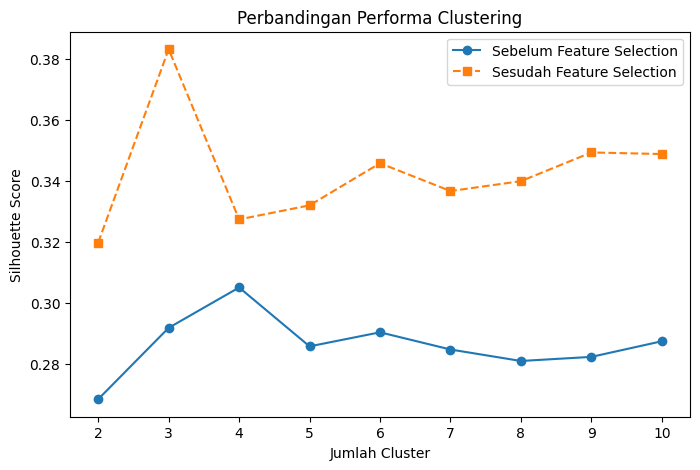

In [25]:
# Plot perbandingan Silhouette Score sebelum dan sesudah Feature Selection
plt.figure(figsize=(8, 5))
plt.plot(silhouette_vals.keys(), silhouette_vals.values(), marker='o', label="Sebelum Feature Selection")
plt.plot(silhouette_pca.keys(), silhouette_pca.values(), marker='s', linestyle='dashed', label="Sesudah Feature Selection")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Performa Clustering")
plt.legend()
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

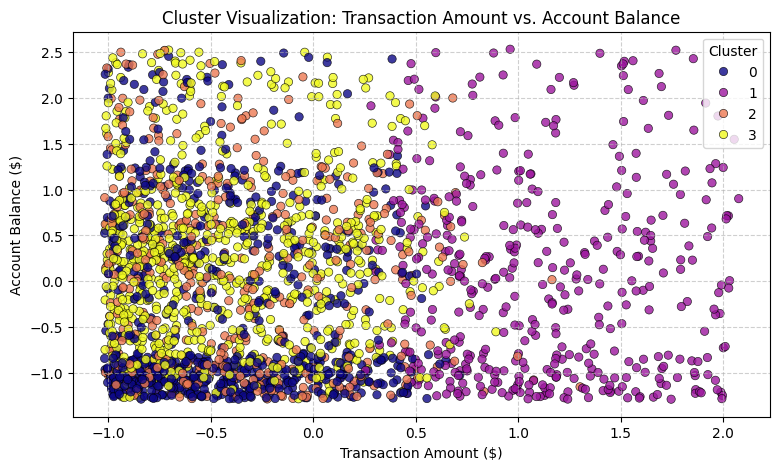

In [26]:
plt.figure(figsize=(9, 5))
sns.scatterplot(
    data=bank_transactions_data_df,
    x='TransactionAmount',
    y='AccountBalance',
    hue='Cluster',
    palette='plasma',
    edgecolor='black',
    alpha=0.8
)
plt.title("Cluster Visualization: Transaction Amount vs. Account Balance", fontsize=12)
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Account Balance ($)")
plt.grid(True, linestyle='--', alpha=0.6)

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [27]:
categorical_cols = ['TransactionType', 'CustomerOccupation', 'Channel']
for column in categorical_cols:
    if column in bank_transactions_data_df and column in label_encoders:
        bank_transactions_data_df[column] = label_encoders[column].inverse_transform(bank_transactions_data_df[column].astype(int))

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [28]:
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

selected_scaled_cols = [feature for feature in numerical_features if feature in df_scaled.columns and feature in bank_transactions_data_df.columns]

df_temp = df_scaled[selected_scaled_cols]

scaler = StandardScaler()
scaler.fit(bank_transactions_data_df[selected_scaled_cols])

bank_transactions_data_df[selected_scaled_cols] = scaler.inverse_transform(df_temp)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [29]:
# Analisis karakteristik setiap cluster
for cluster_label in bank_transactions_data_df['Cluster'].unique():  # Access 'Cluster' from bank_transactions_data_df
    print(f"\nKarakteristik Cluster {cluster_label}:")

    # Memfilter data berdasarkan cluster yang sedang dianalisis
    cluster_subset = bank_transactions_data_df[bank_transactions_data_df['Cluster'] == cluster_label]  # Use bank_transactions_data_df for filtering

    # Menampilkan ringkasan statistik untuk cluster tertentu
    print(cluster_subset.describe())  # Use cluster_subset directly for description


Karakteristik Cluster 3:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         786.000000   786.000000           786.000000     786.000000   
mean           -0.433182     0.954397            -0.384711       0.023359   
std             0.439013     0.508834             0.666810       1.072600   
min            -1.016670     0.018328            -1.567456      -0.206794   
25%            -0.808311     0.524269            -0.952730      -0.206794   
50%            -0.544434     0.917778            -0.373744      -0.206794   
75%            -0.073586     1.311287             0.162355      -0.206794   
max             0.890123     1.985874             1.334624       6.431745   

       AccountBalance  Cluster  
count      786.000000    786.0  
mean         0.264944      3.0  
std          0.912249      0.0  
min         -1.280308      3.0  
25%         -0.471370      3.0  
50%          0.217064      3.0  
75%          0.726593      3.0  
max          2.5

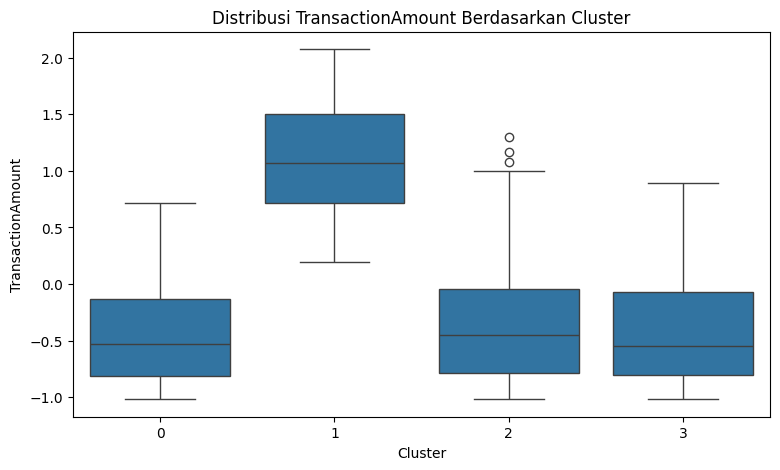

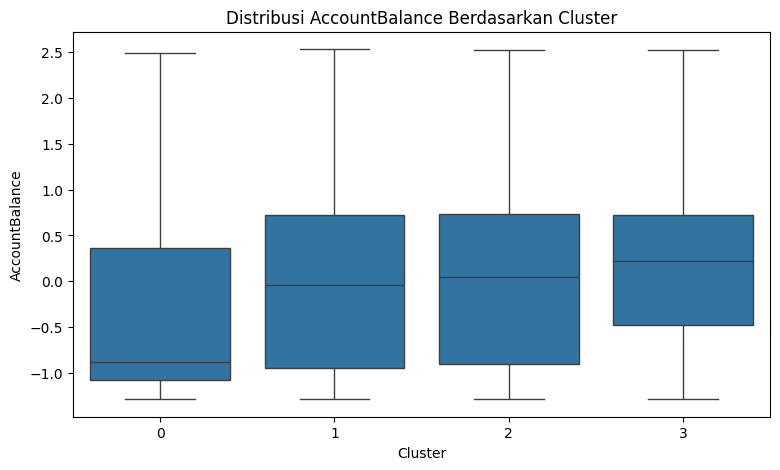

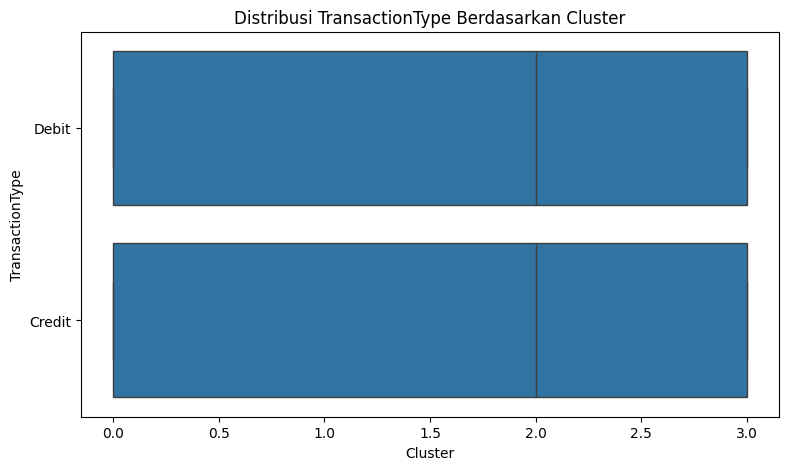

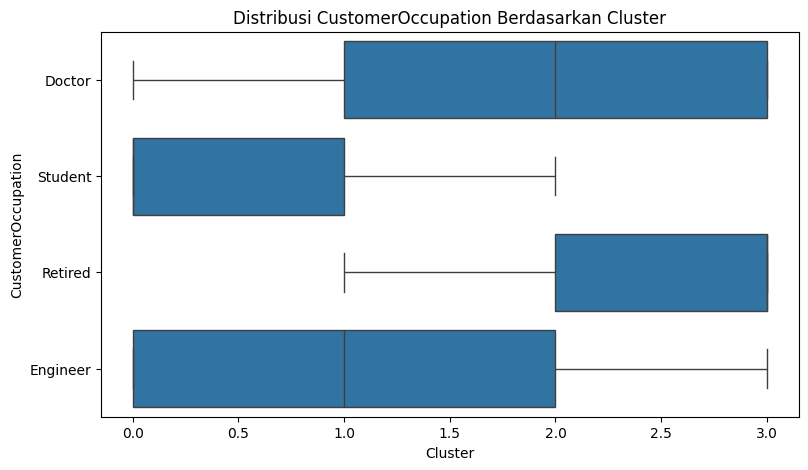

In [30]:
# Visualisasi distribusi fitur dalam setiap cluster
selected_features = ['TransactionAmount', 'AccountBalance', 'TransactionType', 'CustomerOccupation']

for feature in selected_features:
    plt.figure(figsize=(9, 5))
    sns.boxplot(x='Cluster', y=feature, data=bank_transactions_data_df)  # Use bank_transactions_data_df for visualization
    plt.title(f"Distribusi {feature} Berdasarkan Cluster")
    plt.show()

**1. Cluster 0:**

* Rata-rata Transaction Amount: -0.44

* Rata-rata Customer Age: -0.92

* Rata-rata Transaction Duration: -0.48

* Rata-rata Login Attempts: -0.03

* Rata-rata Account Balance: -0.34

**Analisis**:
Cluster ini terdiri dari pelanggan yang memiliki jumlah transaksi lebih rendah, usia yang lebih muda, dan durasi transaksi yang lebih singkat. Akun dalam cluster ini juga memiliki saldo akun yang cenderung lebih rendah dibandingkan dengan cluster lainnya. Hal ini dapat mengindikasikan bahwa pelanggan dalam kelompok ini adalah pengguna baru atau pelanggan dengan aktivitas transaksi yang lebih kecil dan jarang melakukan login.



**2. Cluster 1:**
* Rata-rata Transaction Amount: 1.12

* Rata-rata Customer Age: -0.08

* Rata-rata Transaction Duration: -0.08

* Rata-rata Login Attempts: -0.04

* Rata-rata Account Balance: 0.05

**Analisis**:
Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang lebih tinggi dibandingkan cluster lainnya, namun dengan durasi transaksi yang relatif normal. Saldo akun pelanggan dalam cluster ini juga cukup seimbang. Ini menunjukkan bahwa pelanggan dalam cluster ini adalah pengguna yang cukup aktif dalam bertransaksi dan memiliki daya beli yang lebih tinggi.

**3. Cluster 2:**

* Rata-rata Transaction Amount: -0.37

* Rata-rata Customer Age: -0.11

* Rata-rata Transaction Duration: 1.47

* Rata-rata Login Attempts: 0.05

* Rata-rata Account Balance: 0.07

**Analisis:**
Pelanggan dalam cluster ini memiliki jumlah transaksi yang lebih rendah, tetapi durasi transaksi yang cukup tinggi. Ini bisa menunjukkan bahwa mereka lebih berhati-hati dalam bertransaksi atau lebih sering melakukan transaksi dengan nominal kecil. Akun-akun ini mungkin termasuk pengguna yang lebih suka menghabiskan waktu untuk mengevaluasi transaksi mereka sebelum menyelesaikannya.

**4. Cluster 3:**
* Rata-rata Transaction Amount: -0.43

* Rata-rata Customer Age: 0.95

* Rata-rata Transaction Duration: -0.38

* Rata-rata Login Attempts: 0.02

* Rata-rata Account Balance: 0.26

**Analisis**
Cluster ini mencakup pelanggan dengan jumlah transaksi yang lebih rendah tetapi dengan usia yang lebih tua. Akun dalam cluster ini memiliki saldo yang sedikit lebih tinggi dibandingkan cluster lainnya. Hal ini mengindikasikan bahwa pelanggan dalam cluster ini mungkin lebih berpengalaman secara finansial dan memiliki kecenderungan untuk menabung dibandingkan melakukan transaksi secara impulsif.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
bank_transactions_data_df.to_csv('bank_data.csv', index=False)
print("Dataset yang berisi hasil clustering telah berhasil disimpan sebagai bank_data.csv")

Dataset yang berisi hasil clustering telah berhasil disimpan sebagai bank_data.csv
